# Simple Plotting in Python with matplotlib

If while reading this you have any questions about what certain words are defined as see this computer programming dictionary forum, which you can [view here](http://www.computerhope.com/jargon/program.htm).

## Plotting with matplotlib
[matplotlib](http://matplotlib.org/) is a 2D plotting library that is relatively easy to use to produce publication-quality plots in Python. It provides an interface that is easy to get started with as a beginner, but it also allows you to customize almost every part of a plot. matplotlib's [gallery](http://matplotlib.org/gallery.html) provides a good overview of the wide array of graphics matplotlib is capable of creating. We'll just scratch the surface of matplotlib's capabilities here by looking at making some line plots.

This first line tells the Jupyter Notebook interface to set up plots to be displayed inline (as opposed to opening plots in a separate window). This is only needed for the notebook.

In [1]:
%matplotlib inline

The first step is to import the NumPy library, which we will import as `np` to give us less to type. This library provides an `array` object we can use to perform mathematics operations, as well as easy ways to make such arrays. We use the `linspace` function to create an array of 10 values in `x`, spanning between 0 and 5. We then set `y` equal to `x * x`.

In [2]:
import numpy as np

x = np.linspace(0, 5, 10)
y = x * x

Now we want to make a quick plot of these x and y values; for this we'll use `matplotlib`. First, we import the `matplotlib.pyplot` module, which provides a simple plotting interface; we import this as `plt`, again to save typing.

matplotlib has two main top-level plotting objects: `Figure` and `Axes`. A `Figure` represents a single figure for plotting (a single image or figure window), which contains one or more `Axes` objects. An `Axes` groups together an x and y axis, and contains all of the various plotting methods that one would want to use.

Below, we use the `subplots()` function, with no parameters, to quickly create a `Figure`, `fig`, and an `Axes`, `ax`, for us to plot on. We then use `ax.plot(x, y)` to create a line plot on the `Axes` we created; this command uses pairs of values from the `x` and `y` arrays to create points defining the line.

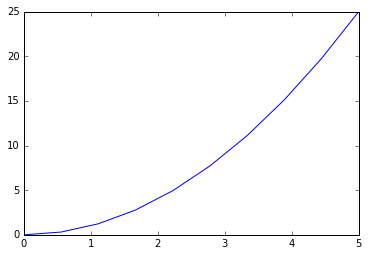

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, y)

Matplotlib provides a wide array of ways to control the appearance of the plot. Below we adjust the line so that it is a thicker, red dashed line. By specifying the `marker` argument, we tell matplotlib to add a marker at each point; in this case, that marker is a square (`s`). For more information on linestyles, markers, etc., type `help(ax.plot)` in a cell, or see the [matplotlib plot docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

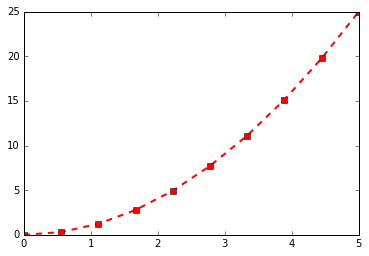

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y, color='red', linestyle='--', linewidth=2, marker='s')

## Controlling Other Plot Aspects

In addition to controlling the look of the line, matplotlib provides many other features for cutomizing the look of the plot. In our plot, below we:

- Add gridlines
- Set labels for the x and y axes
- Add a title to the plot

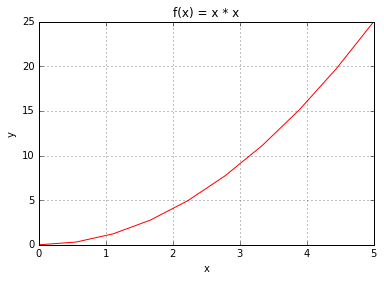

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('f(x) = x * x')

matplotlib also has support for LaTeX-like typesetting of mathematical expressions, called mathtext. This is enabled by surrounding math expressions by `$` symbols. Below, we replace the `x * x` in the title, with the more expressive $x^2$.

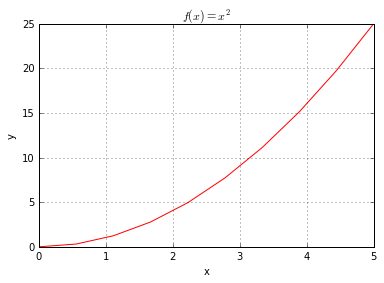

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$f(x) = x^2$')

## Multiple Plots

Often, what we really want is to make multiple plots. This can be accomplished in two ways:

- Plot multiple lines on a single `Axes`
- Combine multiple `Axes` in a single `Figure`

First, let's look at plotting multiple lines. This is really simple--just call plot on the `Axes` you want multiple times:

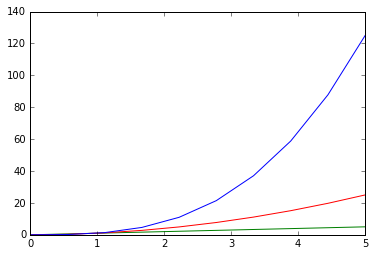

In [7]:
fig, ax = plt.subplots()
ax.plot(x, x, color='green')
ax.plot(x, x * x, color='red')
ax.plot(x, x**3, color='blue')

Of course, in this plot it isn't clear what each line represents. We can add a legend to clarify the picture; to make it easy for matplotlib to create the legend for us, we can label each plot as we make it:

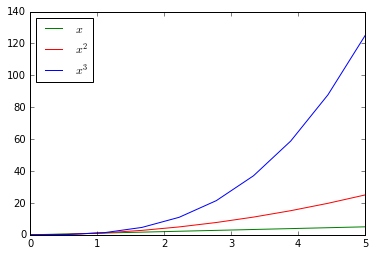

In [8]:
fig, ax = plt.subplots()
ax.plot(x, x, color='green', label='$x$')
ax.plot(x, x * x, color='red', label='$x^2$')
ax.plot(x, x**3, color='blue', label='$x^3$')
ax.legend(loc='upper left')

Another option for looking at multiple plots is to use multiple `Axes`; this is accomplished by passing our desired layout to `subplots()`. The simplest way is to just give it the number of rows and columns; in this case the axes are returned as a two dimensional array of `Axes` instances with shape `(rows, columns)`.

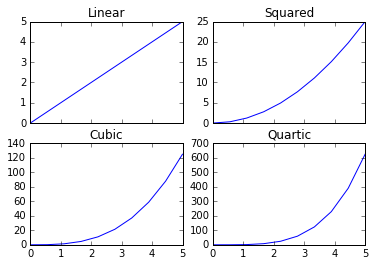

In [9]:
# Sharex tells subplots that all the plots should share the same x-limit, ticks, etc.
# It also eliminates the redundant labelling
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

axes[0, 0].plot(x, x)
axes[0, 0].set_title('Linear')

axes[0, 1].plot(x, x * x)
axes[0, 1].set_title('Squared')

axes[1, 0].plot(x, x ** 3)
axes[1, 0].set_title('Cubic')

axes[1, 1].plot(x, x ** 4)
axes[1, 1].set_title('Quartic')

Of course, that's a little verbose for my liking, not to mention tedious to update if we want to add more labels. So we can also use a loop to plot:

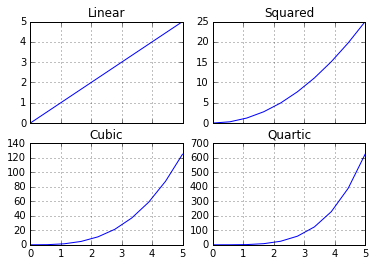

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

titles = ['Linear', 'Squared', 'Cubic', 'Quartic']
y_vals = [x, x * x, x**3, x**4]

# axes.flat returns the set of axes as a flat (1D) array instead
# of the two-dimensional version we used earlier
for ax, title, y in zip(axes.flat, titles, y_vals):
    ax.plot(x, y)
    ax.set_title(title)
    ax.grid(True)

This makes it easy to tweak all of the plots with a consistent style without repeating ourselves. It's also then easier to add, or remove plots and reshape. If you're not familiar with the `zip()` function below, it's Python's way of iterating (looping) over multiple lists of things together; so each time through the loop the first, second, etc. items from each of the lists is returned. It's one of the built-in parts of Python that makes it so easy to use.

## Conclusion

For more information, we suggest looking at:

- [matplotlib's website](http://matplotlib.org/) has many resources for learning more about matplotlib
- matplotlib's [documentation](http://matplotlib.org/contents.html) gives more information on using matplotlib
- matplotlib's [gallery](http://matplotlib.org/gallery.html) is a great place to see visually what matplotlib can do